# StatsModels 패키지 소개

StatsModels는 기초 통계, 회귀 분석, 시계열 분석 등 다양한 통계 분석 기능을 제공하는 파이썬 패키지다.

* 기초 통계 (Statistics)

  * 각종 검정(test) 기능
  * 커널 밀도 추정
  * Generalized Method of Moments

* 회귀 분석 (Linear Regression)

  * 선형 모형 (Linear Model)
  * 일반화 선형 모형 (Generalized Linear Model)
  * 강인 선형 모형 (Robust Linear Model)
  * 선형 혼합 효과 모형 (Linear Mixed Effects Model)
  * ANOVA (Analysis of Variance)
  * Discrete Dependent Variable (Logistic Regression 포함)

* 시계열 분석 (Time Series Analysis)
  
  * ARMA/ARIMA Process
  * Vector ARMA Process
  
StatsModels 패키지를 사용할 때는 다음처럼 api 서브패키지를 임포트하여 사용한다.

```
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
```

# StatsModels의 샘플 데이터

StatsModels 패키지의 개발 목표 중 하나는 기존에 R을 사용하여 통계 분석 및 시계열 분석을 하던 사용자가 파이썬에서 동일한 분석을 할 수 있도록 하는 것이다. 따라서 R에서 제공하던 명령어 뿐만 아니라 Rdatasets 이라는 프로젝트를 통해 R에서 사용하던 1000개 이상의 표준 데이터셋도 동일하게 제공하기 위해 노력하고 있다. 자세한 사항은 다음 프로젝트 홈페이지에서 확인할 수 있다.

* https://github.com/vincentarelbundock/Rdatasets

다음은 위 프로젝트에서 제공하는 데이터셋의 목록이다.

* http://vincentarelbundock.github.io/Rdatasets/datasets.html

이 목록에 있는 데이터를 가져오려면 우선 "Package"이름과 "Item"을 알아낸 후 다음에 설명하는 `get_rdataset` 명령을 이용한다.

## `get_rdataset` 함수

StatsModels의 datasets 서브패키지에 있는 `get_rdataset` 함수를 사용하면 표준 데이터셋을 가져올 수 있다. 사용법은 다음과 같다.

```
get_rdataset(item, [package="datasets"])
```

`item`과 `package` 인수로 해당 데이터의 "Package"이름과 "Item"을 넣는다. "Package"이름이 `datasets`인 경우에는 생략할 수 있다.

이 함수는 인터넷에서 데이터를 다운로드 받으므로 인터넷에 연결되어 있어야 한다.

이렇게 받은 데이터는 다음과 같은 속성을 가지고 있다.

* `data`: 데이터를 담고 있는 데이터프레임
* `__doc__`: 데이터에 대한 설명 문자열. 이 설명은 R 패키지의 내용을 그대로 가져온 것이므로 예제 코드가 R로 되어 있어 파이썬에서 바로 사용할 수 없다.

## 샘플데이터의 예 1: 타이타닉 생존자

In [3]:
import statsmodels.api as sm

data = sm.datasets.get_rdataset("Titanic", package="datasets")
df = data.data
df.tail()

,Name,PClass,Age,Sex,Survived,SexCode
1308,"Zakarian, Mr Artun",3rd,27.0,male,0,0
1309,"Zakarian, Mr Maprieder",3rd,26.0,male,0,0
1310,"Zenni, Mr Philip",3rd,22.0,male,0,0
1311,"Lievens, Mr Rene",3rd,24.0,male,0,0
1312,"Zimmerman, Leo",3rd,29.0,male,0,0


In [4]:
print(data.__doc__)

+-----------+-------------------+
| Titanic   | R Documentation   |
+-----------+-------------------+

Survival of passengers on the Titanic
-------------------------------------

Description
~~~~~~~~~~~

This data set provides information on the fate of passengers on the
fatal maiden voyage of the ocean liner ‘Titanic’, summarized according
to economic status (class), sex, age and survival.

Usage
~~~~~

::

    Titanic

Format
~~~~~~

A 4-dimensional array resulting from cross-tabulating 2201 observations
on 4 variables. The variables and their levels are as follows:

+------+------------+-----------------------+
| No   | Name       | Levels                |
+------+------------+-----------------------+
| 1    | Class      | 1st, 2nd, 3rd, Crew   |
+------+------------+-----------------------+
| 2    | Sex        | Male, Female          |
+------+------------+-----------------------+
| 3    | Age        | Child, Adult          |
+------+------------+-----------------------+
| 4    | 

## 샘플데이터의 예 2: 미국 강수량 

In [6]:
data = sm.datasets.get_rdataset("precip")
print(data.__doc__)

+----------+-------------------+
| precip   | R Documentation   |
+----------+-------------------+

Annual Precipitation in US Cities
---------------------------------

Description
~~~~~~~~~~~

The average amount of precipitation (rainfall) in inches for each of 70
United States (and Puerto Rico) cities.

Usage
~~~~~

::

    precip

Format
~~~~~~

A named vector of length 70.

Note
~~~~

The dataset version up to Nov.16, 2016 had a typo in ``"Cincinnati"``'s
name. The examples show how to recreate that version.

Source
~~~~~~

Statistical Abstracts of the United States, 1975.

References
~~~~~~~~~~

McNeil, D. R. (1977) *Interactive Data Analysis*. New York: Wiley.

Examples
~~~~~~~~

::

    require(graphics)
    dotchart(precip[order(precip)], main = "precip data")
    title(sub = "Average annual precipitation (in.)")

    ## Old ("wrong") version of dataset (just name change):
    precip.O <- local({
       p <- precip; names(p)[names(p) == "Cincinnati"] <- "Cincinati" ; p })
    s

In [7]:
df = data.data
df.tail()

,x
65,17.4
66,40.8
67,29.1
68,14.6
69,59.2


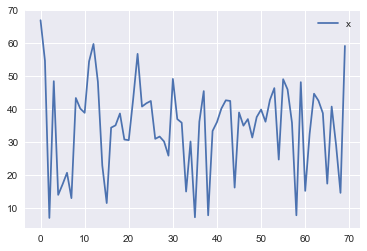

In [9]:
df.plot()
plt.show()

# Scikit-Learn 패키지 소개

Scikit-Learn 패키지는 머신 러닝 교육 및 실무를 위한 파이썬 패키지로 다음과 같은 구성 요소들을 갖추고 있다.

* 벤치마크용 샘플 데이터 세트
* 데이터 전처리(preprocessing) 기능
* 지도 학습(Supervised learning) 모형
* 비지도 학습(Unsupervised learning) 모형
* 모형 평가 및 선택

자세한 내용은 다음 웹사이트를 참조한다.

* http://scikit-learn.org


## scikit-learn의 서브 패키지

scikit-learn 은 서브 패키지 단위로 별도의 기능을 제공하고 있다. 대표적인 서브 패키지와 기능을 나열하면 다음과 같다.

* 자료 제공: 
 * `sklearn.datasets`: 샘플 데이터 세트 제공


* 자료 전처리: 
 * `sklearn.preprocessing`: imputation, encoding 등 단순 전처리
 * `sklearn.feature_extraction`: Feature Extraction


* 모형:
 * `sklearn.base`: Base classes and utility functions
 * `sklearn.pipeline`: Pipeline
 * `sklearn.linear_model`: Generalized Linear Models
 * `sklearn.naive_bayes`: Naive Bayes
 * `sklearn.discriminant_analysis`: Discriminant Analysis
 * `sklearn.neighbors`: Nearest Neighbors
 * `sklearn.mixture`: Gaussian Mixture Models
 * `sklearn.svm`: Support Vector Machines
 * `sklearn.tree`: Decision Trees
 * `sklearn.ensemble`: Ensemble Methods
 * `sklearn.cluster`: Clustering


* 모형 평가: 
 * `sklearn.metrics`: Metrics
 * `sklearn.cross_validation`: Cross Validation
 * `sklearn.grid_search`: Grid Search
 

# Scikit-Learn의 샘플 데이터

sklearn.datasets 서브패키지는 모형 실습을 위한 예제 데이터 세트를 제공한다.

예제 데이터 세트를 불러오는 명령들은 크게 다음과 같은 세가지 계열의 명령으로 나눌 수 있다.

* load 계열 명령: 저장된 dataset import
* fetch 계열 명령: 인터넷에서 캐쉬로 download 후 import
* make 계열 명령: 가상 dataset을 생성



## load 계열 명령

예제 데이터 세트는 데이터 크기가 작은 것부터 큰 것까지 다양하다. scikit-learn 패키지는 작은 예제 데이터는 패키지 안에 포함하여 배포하고 크기가 큰 것들은 첫번째로 데이터를 불러들일때 인터넷에서 다운로드받아 저장해 놓았다가 불러온다.

load 계열의 명령들은 패키지에 처음부터 저장되어 다운로드 없이 바로 쓸 수 있는 것들이다.
 
* `load_boston()`: 회귀 분석용 보스턴 집값 
* `load_diabetes()`: 회귀 분석용 당뇨병 자료
* `load_linnerud()`: 회귀 분석용 linnerud 자료
* `load_iris()`: classification용 iris 자료
* `load_digits()`: classification용 숫자 필기 이미지 자료
* `load_sample_image()`: 압축용 이미지

## fetch 계열 명령

fetch 계열의 명령들은 데이터의 크기가 커서 패키지에 처음부터 저장되어 있지 않고 인터넷에서 다운로드 받아 홈 디렉토리 아래의 scikit_learn_data 라는 서브 디렉토리에 저장한 후 추후 불러들이는 데이터들이다. 따라서 최초 사용시에 인터넷에 연결되어 있지 않으면 사용할 수 없다.
 

* `fetch_covtype()` : 회귀분석용 토지 조사 자료
* `fetch_20newsgroups()`  : 뉴스 그룹 텍스트 자료
* `fetch_olivetti_faces()` : 얼굴 이미지 자료
* `fetch_lfw_people()` : 얼굴 이미지 자료
* `fetch_lfw_pairs()` : 얼굴 이미지 자료
* `fetch_rcv1()` : 로이터 뉴스 corpus
* `fetch_mldata()` : ML 웹사이트에서 다운로드

## make 계열 명령

경우에 따라서는 모형을 시험하기 위해 원하는 특성을 가진 가상의 데이터가 필요할 수 있다. make 계열 명령은 이러한 가상 데이터를 생성하는 역할을 한다.

* `make_regression()`: 회귀 분석용 가상 데이터 생성 
* `make_classification()`: 분류용 가상 데이터 생성 
* `make_blobs()`: 클러스터링용 가상 데이터 생성 

## 데이터 세트의 형식

scikit-learn의 대부분의 샘플 데이터는 `Bunch` 라는 클래스 객체로 생성된다. 이 클래스 객체는 다음과 같은 속성을 가진다.

 * `data`: (필수) 독립 변수 `ndarray` 배열
 * `target`: (필수) 종속 변수 `ndarray` 배열
 * `feature_names`: (옵션) 독립 변수 이름 리스트
 * `target_names`: (옵션) 종속 변수 이름 리스트
 * `DESCR`: (옵션) 자료에 대한 설명
